# 0 - Project kick off

### **Goals:**

1. Show that you can define application and business requirements (Data Architecture competency)
  - Clear list of initial requirements
2. Show how you have identified an interesting project that has the ability to cover many modules of the course. You have in mind a number of ways to increase complexity to meet more challenging learning objectives and you have in mind some way of obtaining or generating useful data.

**Ask**
- [ ] What is meant by 'business requirements'? We have app requirements but no business

## 1: Define application & business requirements

### **Idea: Stock data & portfolio mgmt**

Portfolio optimization tool
- A new investor doesn't know how much to invest for a set of companies, but has researched companies they like
- the tool outputs how much of each company this person should buy depending on their risk tolerance
- outputs expected return, some other things as well that we might need 

### **Application requirements**

- The application should take in a list of companies and a risk tolerance; Output an EF (efficient frontier, see below) and preferably some kind of measure of accuracy (this will be determined by the calculations used to determine the EF)
- This requires some kind of UI, whether it's a GUI or a CLI. In either case it should be simple, intuitive, and have sufficient documentation.

### **ERD (Database sketch)**

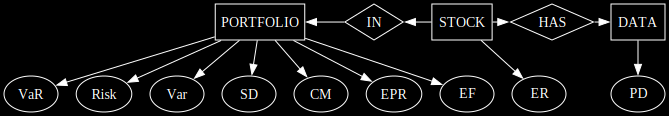

In [128]:
# Python - Graphviz
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='ERD')

# Set the size of the canvas to be bigger
dot.attr(size='12,9')  # Width=8, Height=6

# Set graph attributes for a black background and white nodes and edges
dot.attr(bgcolor='black')
dot.attr('node', color='white', fontcolor='white', style='filled', fillcolor='black')
dot.attr('edge', color='white')

# Set border color to black
dot.attr('graph', color='black')

# Turn off splines to remove the shadow/reflection around corners
dot.attr(splines='false')

# Add nodes
dot.node('P', 'PORTFOLIO', shape='rectangle')
dot.node('V', 'VaR')
dot.node('R', 'Risk')
dot.node('VR', 'Var')
dot.node('SD', 'SD')
dot.node('CM', 'CM')
dot.node('EPR', 'EPR')
dot.node('EF', '<<u>EF</u>>')
dot.node('ER', '<<u>ER</u>>')
dot.node('IN', 'IN', shape='diamond')
dot.node('STOCK', 'STOCK', shape='rectangle')
dot.node('HAS', 'HAS', shape='diamond')
dot.node('DATA', 'DATA', shape='rectangle')
dot.node('PD', '<<u>PD</u>>')

# Add subgraph for organizing nodes horizontally
with dot.subgraph() as s:
    s.attr(rank='same')  # Set all nodes in the subgraph to the same rank
    s.node('P')  # Node 'portfolio'
    s.node('IN')  # Node 'in'
    s.node('STOCK')  # Node 'stock'
    s.node('HAS')  # Node 'has'
    s.node('DATA')  # Node 'data'

# Add edges
dot.edge('P', 'V')
dot.edge('P', 'R')
dot.edge('P', 'VR')
dot.edge('P', 'SD')
dot.edge('P', 'CM')
dot.edge('P', 'EPR')
dot.edge('P', 'EF')
dot.edge('P', 'IN', dir='back')
dot.edge('IN', 'STOCK', dir='back')
dot.edge('STOCK', 'ER')
dot.edge('STOCK', 'HAS')
dot.edge('HAS', 'DATA')
dot.edge('DATA', 'PD')

# Render the graph
dot

#### **Legend:**

Portfolio:
- **VaR: Value at Risk**  
  - VaR is a statistical measure used to quantify the level of financial risk within a portfolio or investment over a certain time horizon. It represents the maximum potential loss that a portfolio may face with a certain level of confidence within a given period.
- **Risk:**
  - Risk typically refers to the overall risk associated with a portfolio, often measured using metrics such as standard deviation, variance, or other measures of volatility.
- **SD: Standard Deviation**
  - Standard deviation is a measure of the dispersion or variability of returns in a portfolio. It indicates how much the returns of a portfolio deviate from its average return.
- **Var: Variance**
  - Variance is a measure of the dispersion of returns in a portfolio. It is the average of the squared differences between each return and the mean return of the portfolio.
- **CM: Covariance Matrix**
  - The covariance matrix represents the relationships between the returns of different assets in a portfolio. It provides insight into how the returns of one asset move in relation to the returns of another asset.
- **EPR: Expected Portfolio Returns**
  - Expected Portfolio Returns represent the anticipated returns that a portfolio is expected to generate over a specified period, based on the expected returns of its individual assets and their respective weights in the portfolio.
- **EF: Efficient Frontier**
  - The Efficient Frontier is a concept from modern portfolio theory that represents a set of optimal portfolios offering the highest expected return for a given level of risk or the lowest risk for a given level of expected return. Portfolios on the efficient frontier are considered to be "efficient" because they provide the best trade-off between risk and return.

Stock:
- **ER: Expected Return**
  - Expected Return is the anticipated return on an individual stock or asset within a portfolio. It represents the average return that an investor can expect to receive based on probabilities of different outcomes.

Data:
- **PD: Performance Data**
  - Performance Data refers to various metrics and measures used to evaluate the performance of a portfolio, including returns, risk-adjusted returns, and other relevant performance indicators.

## 2: Link to modules & come up with some ways to (1) increase complexity, (2) generate/obtain data

### Link Modules:

- **RDMS:** We can use RDMS and SQL to store the data. We want to get stock data from outside sources and create RDMS from this data. 
- **Conceptual Design:** We can use an ERD to showcase our backend set up through relationships. This helps in business positions when kickstarting a project as it makes it clear what the setup will look like. 

### Generate/Obtain Data

- As said above we want to obtain data from an outside source, such as yfinance. We can obtain historical data such as daily prices for a set amount of time. Historical price data is crucial for this project
- Using this historical data we can calculate necesarry data such as expected return of the stock or variance of the stock to check risk. 
- We can then relate chosen stocks to obtain relative quantities.

### Increase Complexity

- Use market data for benchmarking
- Use other assets such as bonds or commodities to analyze in the portfolio
- Constraints such as maximum or minimum weights for certain assets. 
- Advanced Optimization techniques: Quadratic Programming, Linear Programming, Heuristic Methods